In [10]:
library(RPostgreSQL)

In [11]:
drvv <- dbDriver("PostgreSQL")
drvv

<PostgreSQLDriver>

In [12]:
con <- dbConnect(drvv,
                 dbname = "imdb",
                 host = "localhost",
                 port = 5432,
                 user = "postgres",
                 password = "bda505")

con

<PostgreSQLConnection>

Now the task is:
- First get the count of average rating of movies by Alfred Hitchcock (excluding NULL ratings) with an SQL query
- And summarize these values by decades (total count of movies and average rating by decade)
- You can use floor division by floor(a/b) or its operator %/% in R
- You can use aggregate function in R
- You can recycle all codes that we have written sor far, or use the net
- You can cooperate

In [13]:
query <- "
WITH hitch AS
(
SELECT nconst
FROM name_basics nb
WHERE nb.primaryname = 'Alfred Hitchcock'
	AND nb.primaryprofession ~ 'director'
),
t_ids AS
(
SELECT tp.tconst
FROM hitch LEFT JOIN title_crew tp ON hitch.nconst=tp.directors
)
SELECT startyear, count(*), avg(tr.averagerating) avrate
FROM t_ids LEFT JOIN title_basics tb ON t_ids.tconst=tb.tconst
	LEFT JOIN title_ratings tr ON tb.tconst=tr.tconst
WHERE tb.titletype = 'movie'
	AND tr.averagerating IS NOT NULL
GROUP BY startyear
ORDER BY startyear
"

In [14]:
hitch_df <- dbGetQuery(con, query)

In [15]:
hitch_df

startyear,count,avrate
1925,1,6.000000
1927,3,6.566667
1928,3,5.766667
1929,2,6.650000
1930,2,5.600000
1931,3,5.900000
1932,1,5.800000
1934,2,6.450000
1935,1,7.800000
1936,2,6.850000


In [16]:
hitch_df$sumrate <- hitch_df$count * hitch_df$avrate

In [17]:
hitch_df

startyear,count,avrate,sumrate
1925,1,6.000000,6.0
1927,3,6.566667,19.7
1928,3,5.766667,17.3
1929,2,6.650000,13.3
1930,2,5.600000,11.2
1931,3,5.900000,17.7
1932,1,5.800000,5.8
1934,2,6.450000,12.9
1935,1,7.800000,7.8
1936,2,6.850000,13.7


In [18]:
hitch_df$dec <- (hitch_df$startyear %/% 10) * 10

In [19]:
hitch_df

startyear,count,avrate,sumrate,dec
1925,1,6.000000,6.0,1920
1927,3,6.566667,19.7,1920
1928,3,5.766667,17.3,1920
1929,2,6.650000,13.3,1920
1930,2,5.600000,11.2,1930
1931,3,5.900000,17.7,1930
1932,1,5.800000,5.8,1930
1934,2,6.450000,12.9,1930
1935,1,7.800000,7.8,1930
1936,2,6.850000,13.7,1930


In [21]:
hitch_agg <- aggregate(hitch_df[,c(2,4)],
                       by = list(hitch_df$dec),
                       FUN = sum)

In [22]:
hitch_agg

Group.1,count,sumrate
1920,9,56.3
1930,14,90.3
1940,12,89.0
1950,11,85.6
1960,5,36.4
1970,2,14.3


In [23]:
hitch_agg$avrate <- hitch_agg$sumrate / hitch_agg$count

In [24]:
hitch_agg$sumrate <- NULL

In [25]:
hitch_agg

Group.1,count,avrate
1920,9,6.255556
1930,14,6.450000
1940,12,7.416667
1950,11,7.781818
1960,5,7.280000
1970,2,7.150000


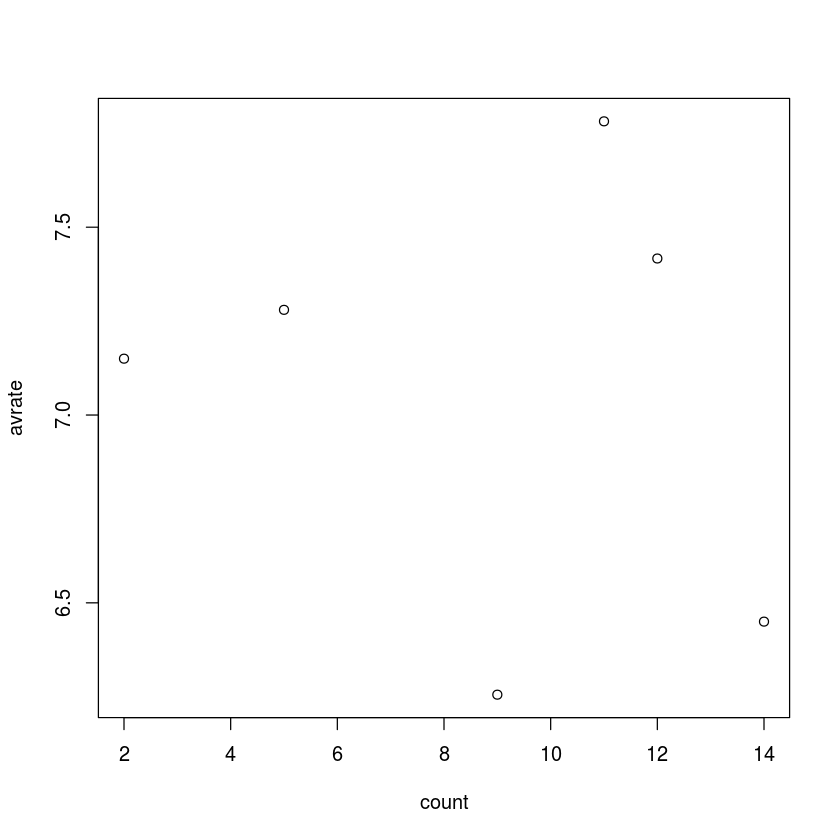

In [26]:
plot(hitch_agg[,-1])

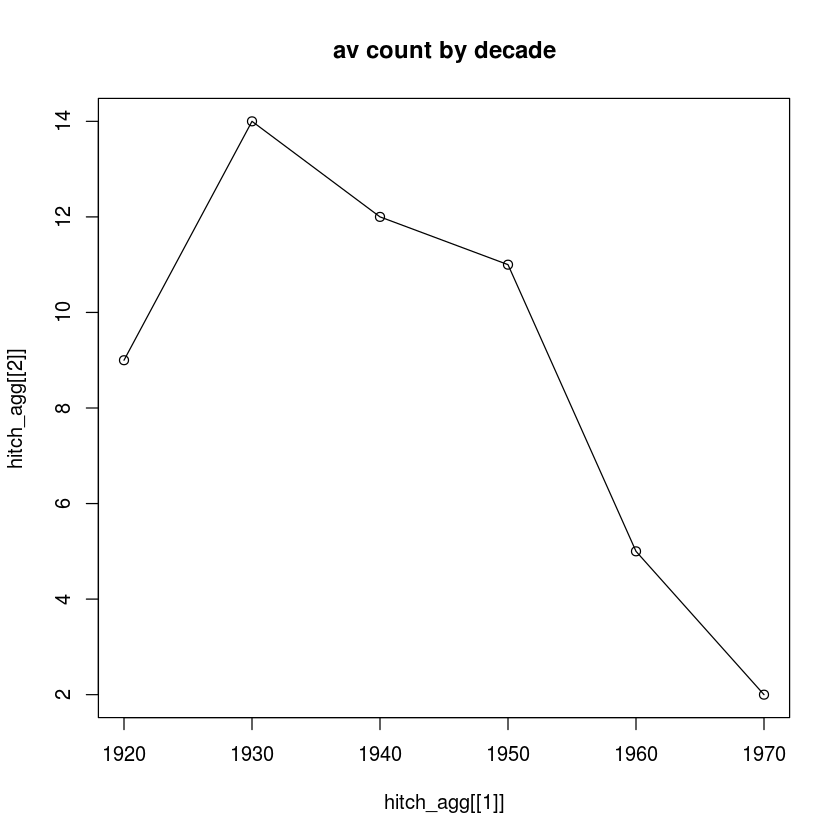

In [29]:
plot(x = hitch_agg[[1]], y = hitch_agg[[2]], main = "av count by decade")
lines(x = hitch_agg[[1]], y = hitch_agg[[2]], type = "l")

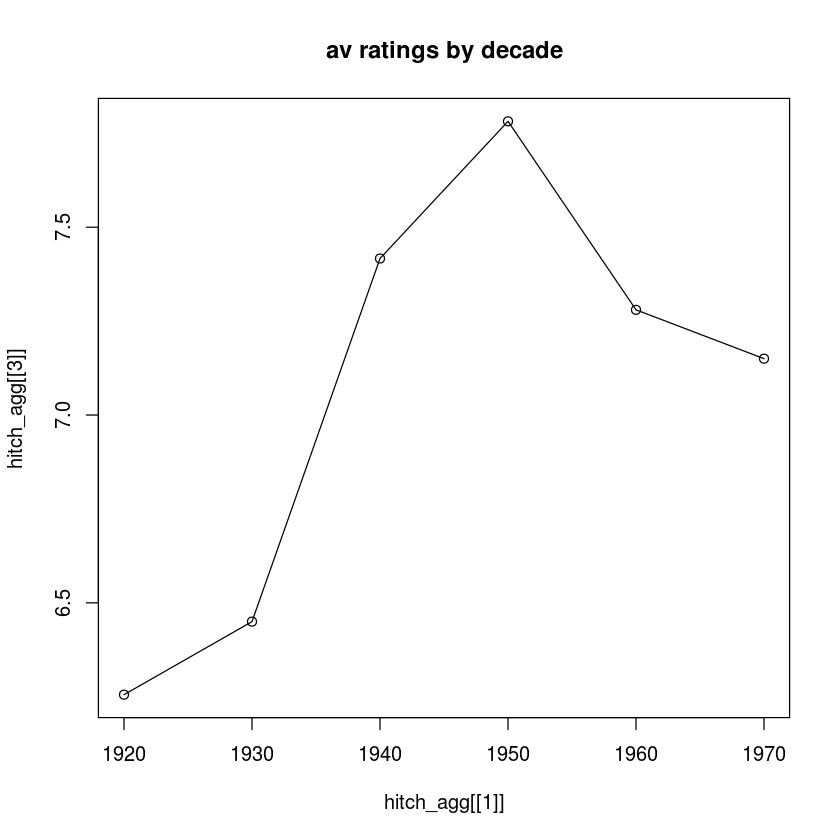

In [30]:
plot(x = hitch_agg[[1]], y = hitch_agg[[3]], main = "av ratings by decade")
lines(x = hitch_agg[[1]], y = hitch_agg[[3]], type = "l")